In [112]:
import pandas as pd
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential 
from keras.layers import Dense, Activation 
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras import initializers
import math 
from tensorflow import keras
import statistics 

In [31]:
train_data = pd.read_csv ("train.csv")
test_data = pd.read_csv ("test.csv")

In [32]:
train_data.shape

(428, 3)

In [33]:
test_data.shape

(106, 3)

In [47]:
train_data

,ArticleId,Text,Category
0,1976,lifestyle governs mobile choice faster better ...,tech
1,1797,french honour director parker british film dir...,entertainment
2,1866,fockers fuel festive film chart comedy meet fo...,entertainment
3,1153,housewives lift channel 4 ratings debut us tel...,entertainment
4,342,u2 desire number one u2 three prestigious gram...,entertainment
...,...,...,...
423,1388,parker saxophone heads auction saxophone belon...,entertainment
424,1917,wine comedy wins critics award quirky comedy s...,entertainment
425,1122,playstation 3 processor unveiled cell processo...,tech
426,2166,briton wins short film oscar three five nomine...,entertainment


# Data Preprocessing

## Vectorization 

In [39]:
# combine two train set and test set
full_data = pd.concat([train_data, test_data], axis=0)
#full_data
text = full_data['Text']

(534,)

In [45]:
# Term Frequency - Inverse Document Frequency (TF - IDF)
vectorizor = TfidfVectorizer() 
vectorizor.fit (text)

# encode article 
vector = vectorizor.transform(text)

# print encoded vector
print (f'vector shape: {vector.shape} \n')
print (f'article vector\n {vector.toarray()}')

vector shape: (534, 14927) 

article vector
 [[0.         0.02025329 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02656619 0.         ... 0.         0.         0.        ]]


## Preparing data for modelling

In [103]:
import numpy as np
train_X = vector[:428].toarray()
test_X = vector[428:].toarray()
train_y_bool = list(train_data ['Category'] == "tech")
test_y_bool = list(test_data ['Category'] == "tech")
train_y = np.array(list(map(int, train_y_bool)))
test_y =  np.array(list(map(int, test_y_bool)))


# Task 2(d) Neural Network

## Train a neural network with one hidden layer

In [115]:
# define the neural network 
hidden_units = [5, 20, 40]
n_features = train_X.shape[1]
train_accuracy = []
test_accuracy = []
losses = {}
for h in hidden_units:
    initializer = initializers.RandomUniform(minval = 0, maxval = 0.1, seed=None)
    nn_model = Sequential ()
    nn_model.add (Dense(h, input_dim = n_features, activation = 'relu', kernel_initializer = initializer) )  # hidden layer: a dense layer that is fully connected
    nn_model.add(Dense(2, activation = 'softmax', kernel_initializer = initializer))   # ouput layer
    
    # define optimiser and initialise weights 
    opt = keras.optimizers.Adam(learning_rate = 0.01)
    # compile the model
    nn_model.compile (loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

    # fit the model
    history = nn_model.fit (train_X, train_y, epochs = 100 , batch_size = 10)
    losses[h] = history.history['loss']    # keep track of the loss
    
    # train accuracy
    _, accuracy = nn_model.evaluate(train_X, train_y)
    train_accuracy.append (accuracy)

    # test accuracy
    y_pred = nn_model.predict_classes(test_X)
    test_accuracy.append(accuracy_score (test_y, y_pred))

Epoch 1/100
43/43 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.4509
Epoch 2/100
43/43 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5164
Epoch 3/100
43/43 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5607
Epoch 4/100
43/43 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5958
Epoch 5/100
43/43 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5911
Epoch 6/100
43/43 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5607
Epoch 7/100
43/43 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5864
Epoch 8/100
43/43 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5491
Epoch 9/100
43/43 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5070
Epoch 10/100
43/43 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5350
Epoch 11/

In [151]:
avg_losses = []
for i in losses.keys():
    avg_losses.append(statistics.mean(losses[i]))
avg_losses

[0.6931475603580475, 0.6931506824493409, 0.6931644040346145]

## Plot Cross-Entropy Loss vs Epochs

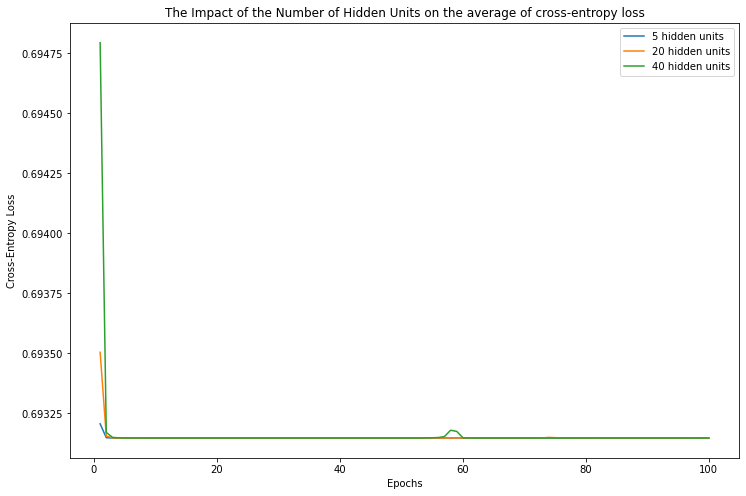

In [173]:
# set the width and height of the graph
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(8)

x = list(range(1,101))
for j in losses.keys():
    y = losses[j]
    l = "{} hidden units".format (j)
    plt.plot(x, y, label = l)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Cross-Entropy Loss")
plt.title ("The Impact of the Number of Hidden Units on the average of cross-entropy loss")
plt.show()

Text(0.5, 1.0, 'The Impact of the Number of Hidden Units on the average of cross-entropy loss\n     Zoomed-in tail ')

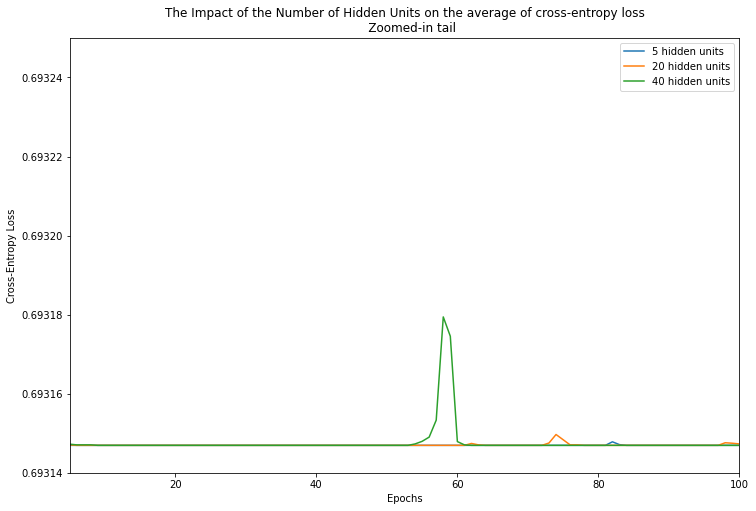

In [175]:
""" A zoomed-in version """
# set the width and height of the graph
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(8)

x = list(range(1,101))
for j in losses.keys():
    y = losses[j]
    l = "{} hidden units".format (j)
    plt.plot(x, y, label = l)
    plt.xlim(5, 100)
    plt.ylim(0.69314, 0.69325)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Cross-Entropy Loss")
plt.title ("The Impact of the Number of Hidden Units on the average of cross-entropy loss\n     Zoomed-in tail ")




Text(0.5, 1.0, 'The Impact of the Number of Hidden Units on the average of cross-entropy loss\n     Zoomed-in head ')

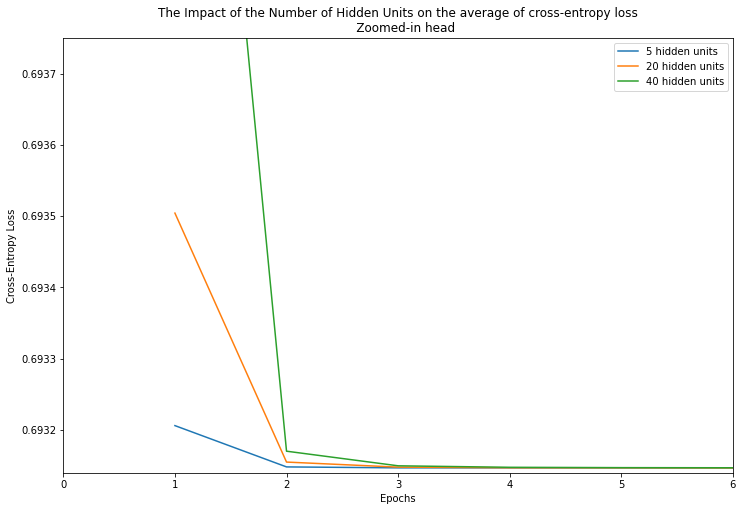

In [176]:
""" A zoomed-in version """
# set the width and height of the graph
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(8)

x = list(range(1,101))
for j in losses.keys():
    y = losses[j]
    l = "{} hidden units".format (j)
    plt.plot(x, y, label = l)
    plt.xlim(0, 6)
    plt.ylim(0.69314, 0.69375)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Cross-Entropy Loss")
plt.title ("The Impact of the Number of Hidden Units on the average of cross-entropy loss\n     Zoomed-in head ")


### The Effect of the Numbers of Hidden Units

A higher number of hidden units in the hidden layer seems to have a greater impact on reducing the average entropy loss after the fist iteration. After that, the loss incurred by different numbers of hidden units converge at the third iteration. Till around the 46th iteration, the number of hidden units have little influence on the amount of loss. However, there is a surge of cross-entropy loss between the 46th and 61st iterations when 40 hidden units are deployed. Subsequently, there is a minor surge of loss between the 75th and the 18th itertions when 20 hidden units are used, followed by a tiny surge when 5 hidden units are used. Therefore, it appears that neural network with less hidden units tend to be more stable with respect to average cross-entropy loss. 